"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Read the csv
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


1.Handle missing values and duplicates.
2.Check datatypes.
3.Understand the dataset.

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [5]:
#Check the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
#Check features with Missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [13]:
for feature in features_with_na:
    print(feature)

Age
TypeofContact
DurationOfPitch
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
NumberOfChildrenVisiting
MonthlyIncome


In [14]:
#Statistics on Numerical columns
df[features_with_na].select_dtypes(exclude=object).describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


Imputing The Nul values
Impute Median for Age
Impute Mode for TypeofContact
Impute Median for DurationOfPitch
Impute Mode for NumberOfFollowups as it is discrete value
Impute Mode for PreferredPropertyStar
Impute Median for NumberOfTrips
Impute Mode for NumberOfChildrenVisiting
Impute Median for MonthlyIncome

In [15]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#Duration of Pich
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8472\3957637832.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8472\3957637832.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [18]:
df.drop('CustomerID', inplace=True, axis=1)

In [19]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [20]:
df.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [21]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], inplace=True, axis=1)

In [22]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
#get all Numeric features
numerical_features = [feature for feature in df.columns if df[feature].dtype != '0']
print('Num of Numerical features : ',len(numerical_features))

Num of Numerical features :  18


In [24]:
#get all Categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == '0']
print('Num of categorical features : ',len(cat_features))

Num of categorical features :  0


In [25]:
#get all Discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
print('Num of discrete features : ',len(discrete_features))

Num of discrete features :  15


In [26]:
#get all Continuous features 
cont_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Num of Continuous features : ',len(cont_features))

Num of Continuous features :  3


In [27]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [29]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [31]:
#Create Transformers with 3 types of Transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

onehot_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", onehot_transformer, cat_features),
     ("StandardScaler", numeric_transformer, num_features)
    ]
    )


In [32]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [33]:
#Apply transformation on X_Train
X_train = preprocessor.fit_transform(X_train)

In [34]:
#Apply transformation on X_test
X_test = preprocessor.transform(X_test)

In [35]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.157926,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.508072,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.396069,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.064073,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.730071,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.045924,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397072,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.064073,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.045924,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [37]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost"      : AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

#Make Predictions
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Training Set Performance
model_train_accuracyscore = accuracy_score(y_train, y_train_predict)
model_train_f1score = f1_score(y_train,y_train_predict, average='weighted')
model_train_precisionscore = precision_score(y_train,y_train_predict)
model_train_recallscore = recall_score(y_train, y_train_predict)
model_train_roc_auc = roc_auc_score(y_train, y_train_predict)

#Test Set Performance
model_test_accuracyscore = accuracy_score(y_test, y_test_predict)
model_test_f1score = f1_score(y_test, y_test_predict, average='weighted')
model_test_precisionscore = precision_score(y_test, y_test_predict)
model_test_recallscore = recall_score(y_test, y_test_predict)
model_test_roc_auc = roc_auc_score(y_test, y_test_predict)

print('Model : ',list(models.keys())[i])

print('Model Performance for Training Set')
print('Accuracy         : {:.4f}'.format(model_train_accuracyscore))
print('F1 Score         : {:.4f}'.format(model_train_f1score))
print('Precision Score  : {:.4f}'.format(model_train_precisionscore))
print('Recall Score     : {:.4f}'.format(model_train_recallscore))
print('ROC AUC Score    : {:.4f}'.format(model_train_roc_auc))

print('-'*35)

print('Model Performance for Test Set')
print('Accuracy         : {:.4f}'.format(model_test_accuracyscore))
print('F1 Score         : {:.4f}'.format(model_test_f1score))
print('Precision Score  : {:.4f}'.format(model_test_precisionscore))
print('Recall Score     : {:.4f}'.format(model_test_recallscore))
print('ROC AUC Score    : {:.4f}'.format(model_test_roc_auc))

Model :  AdaBoost
Model Performance for Training Set
Accuracy         : 0.8478
F1 Score         : 0.8146
Precision Score  : 0.7815
Recall Score     : 0.2551
ROC AUC Score    : 0.6194
-----------------------------------
Model Performance for Test Set
Accuracy         : 0.8354
F1 Score         : 0.7987
Precision Score  : 0.7500
Recall Score     : 0.2356
ROC AUC Score    : 0.6083


In [38]:
#Hyperparameter Tuning
rf_params = {"max_depth" : [5,8,None,15,10],
             "min_samples_split" : [2,8,15,20],
             "max_features" : [5,7,8,'Auto'],
             "n_estimators" : [100,200,500,1000]}
ada_params = {"n_estimators" : [50,60,70,80,90],
              "algorithm" : ['SAMME']}

In [39]:
#Models List for Hyperparameter Tuning
randomcv_models = [('RF', RandomForestClassifier(), rf_params),
                   ('ADA', AdaBoostClassifier(), ada_params)]


In [40]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=param,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------Best params for {model_name}-------------")
    print(model_param[model_name])




Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\lenovo\Desktop\Study\Kaggle_Projects\Holiday_Package_Prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\Desktop\Study\Kaggle_Projects\Holiday_Package_Prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\Desktop\Study\Kaggle_Projects\Holiday_Package_Prediction\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\lenovo\De

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\lenovo\Desktop\Study\Kaggle_Projects\Holiday_Package_Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


-------------Best params for RF-------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
-------------Best params for ADA-------------
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [41]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators=500,
                                             min_samples_split=2,
                                             max_features=8,
                                             max_depth=None),
    "AdaBoost" : AdaBoostClassifier(n_estimators=80, algorithm='SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

#Make Predictions
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Training Set Performance
model_train_accuracyscore = accuracy_score(y_train, y_train_predict)
model_train_f1score = f1_score(y_train,y_train_predict, average='weighted')
model_train_precisionscore = precision_score(y_train,y_train_predict)
model_train_recallscore = recall_score(y_train, y_train_predict)
model_train_roc_auc = roc_auc_score(y_train, y_train_predict)

#Test Set Performance
model_test_accuracyscore = accuracy_score(y_test, y_test_predict)
model_test_f1score = f1_score(y_test, y_test_predict, average='weighted')
model_test_precisionscore = precision_score(y_test, y_test_predict)
model_test_recallscore = recall_score(y_test, y_test_predict)
model_test_roc_auc = roc_auc_score(y_test, y_test_predict)

print(f'{list(models.keys())[i]} Model with Hyperparameter tuning')

print('Model Performance for Training Set')
print('Accuracy         : {:.4f}'.format(model_train_accuracyscore))
print('F1 Score         : {:.4f}'.format(model_train_f1score))
print('Precision Score  : {:.4f}'.format(model_train_precisionscore))
print('Recall Score     : {:.4f}'.format(model_train_recallscore))
print('ROC AUC Score    : {:.4f}'.format(model_train_roc_auc))

print('-'*35)

print('Model Performance for Test Set')
print('Accuracy         : {:.4f}'.format(model_test_accuracyscore))
print('F1 Score         : {:.4f}'.format(model_test_f1score))
print('Precision Score  : {:.4f}'.format(model_test_precisionscore))
print('Recall Score     : {:.4f}'.format(model_test_recallscore))
print('ROC AUC Score    : {:.4f}'.format(model_test_roc_auc))

c:\Users\lenovo\Desktop\Study\Kaggle_Projects\Holiday_Package_Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Model with Hyperparameter tuning
Model Performance for Training Set
Accuracy         : 0.8465
F1 Score         : 0.8132
Precision Score  : 0.7699
Recall Score     : 0.2524
ROC AUC Score    : 0.6176
-----------------------------------
Model Performance for Test Set
Accuracy         : 0.8364
F1 Score         : 0.7977
Precision Score  : 0.7818
Recall Score     : 0.2251
ROC AUC Score    : 0.6049


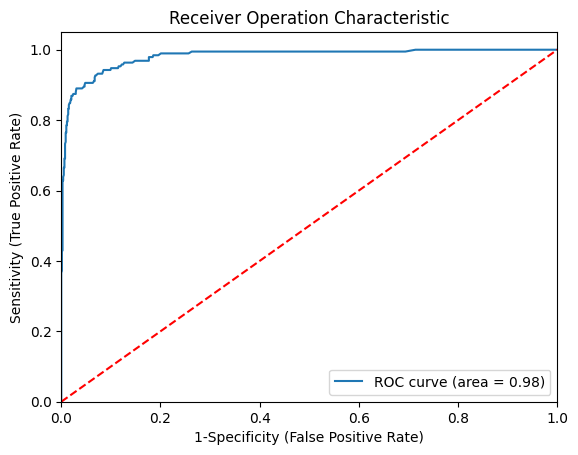

In [42]:
#Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve,auc
plt.figure()

#Add the models to the list that we want to view on ROC graph
auc_models = [
    {'label' : 'Random Forest Classifier',
     'model' : RandomForestClassifier(n_estimators=500,
                                             min_samples_split=2,
                                             max_features=8,
                                             max_depth=None),
     'auc' : 0.8345
    },
    ]
#Create Loop through all the models
for algo in auc_models:
    model = algo['model'] #Select the model
    model.fit(X_train,y_train)#Train the model
#[:, 1] is used to extract the predicted probabilities of the positive class (class 1)
#Compute False positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
#calculate Area under the cure to display on the plot
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operation Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()